In [180]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras 
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix

In [143]:
data = pd.read_csv('data/Churn_Modelling.csv')
data.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5439,5440,15582168,Muravyova,713,Germany,Female,61,4,149525.34,2,1,0,123663.63,0
234,235,15704769,Smith,585,France,Female,67,5,113978.97,2,0,1,93146.11,0
5175,5176,15626322,Lees,699,Spain,Female,29,9,127570.93,2,1,0,164756.81,0
6987,6988,15577170,Manfrin,532,France,Male,60,5,76705.87,2,0,1,13889.73,0
9439,9440,15692226,Onwumelu,705,France,Female,31,3,142905.51,1,1,1,58134.97,0


In [144]:
counts = data.nunique()
counts

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [145]:
data.corr()['Exited']

RowNumber         -0.016571
CustomerId        -0.006248
CreditScore       -0.027094
Age                0.285323
Tenure            -0.014001
Balance            0.118533
NumOfProducts     -0.047820
HasCrCard         -0.007138
IsActiveMember    -0.156128
EstimatedSalary    0.012097
Exited             1.000000
Name: Exited, dtype: float64

<AxesSubplot:>

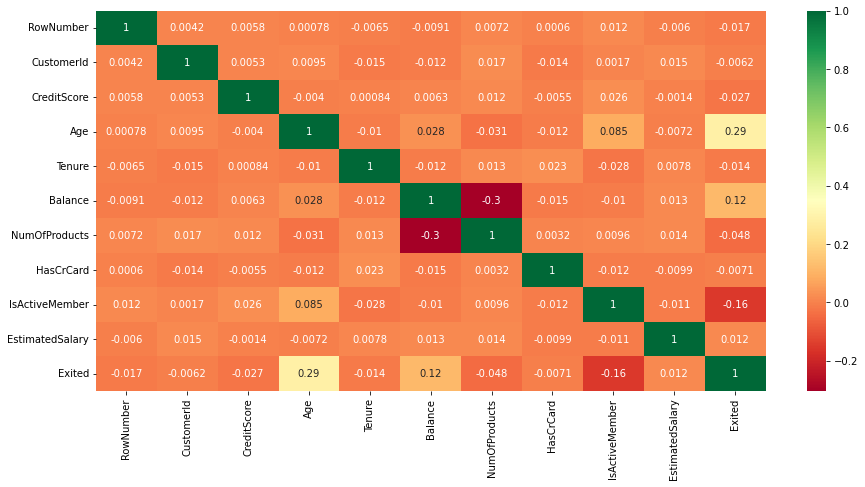

In [146]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(), annot=True,cmap='RdYlGn')

In [147]:
data.drop(['CustomerId','RowNumber','Surname'],axis=1, inplace=True)

In [148]:
data.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1950,680,France,Female,37,10,123806.28,1,1,0,81776.84,1
4797,793,Germany,Female,32,1,96408.98,1,1,1,138191.81,0
5565,683,Germany,Male,35,5,144961.97,1,0,1,26796.73,0
913,756,Germany,Male,27,1,131899.00,1,1,0,93302.29,0
1863,731,Spain,Male,25,8,96950.21,1,1,0,97877.92,0


In [149]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Geography', ylabel='Exited'>

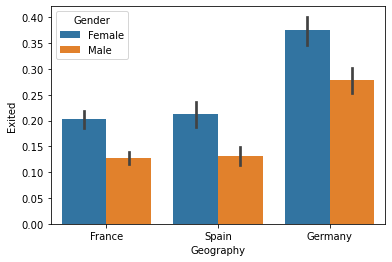

In [150]:
sns.barplot(data['Geography'],data['Exited'],hue = data['Gender'])

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Tenure', ylabel='Exited'>

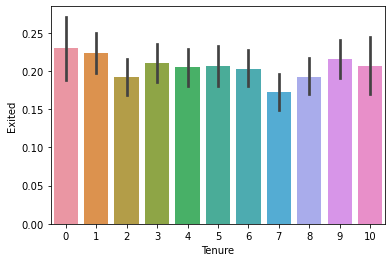

In [151]:
sns.barplot(data['Tenure'],data['Exited'])

In [152]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

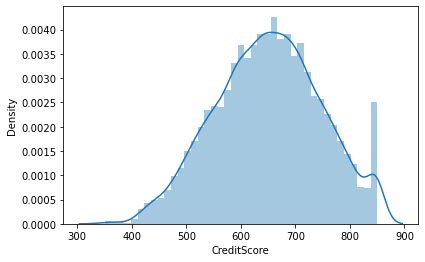

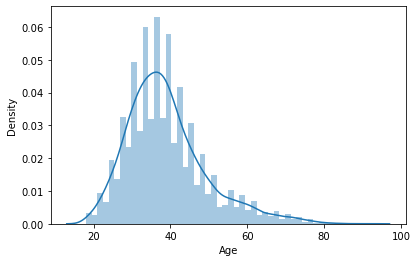

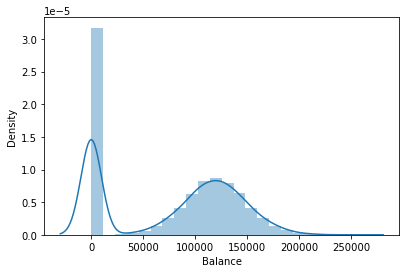

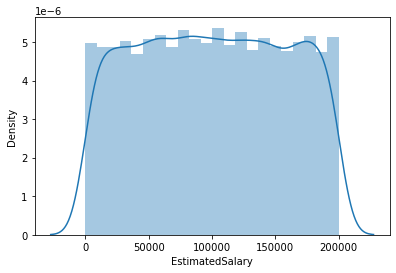

In [153]:
cols = [0,3,5,9]
for col in cols:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(data.iloc[:,col])

<AxesSubplot:>

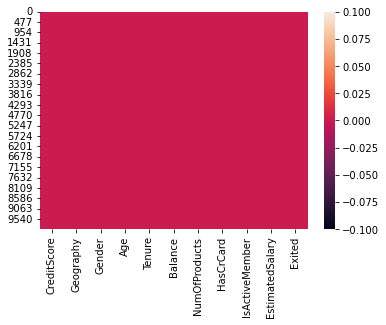

In [154]:
sns.heatmap(data.isna())

In [155]:
data.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6425,793,France,Male,39,3,137817.52,1,0,0,83997.79,0
8497,587,France,Male,36,1,0.00,2,0,1,17135.60,0
9795,506,France,Male,43,2,0.00,2,1,0,105568.60,0
3639,680,Germany,Female,48,8,115115.38,1,1,0,139558.60,1
5372,598,Spain,Female,39,5,0.00,2,1,1,83103.46,0


In [156]:
X = data.drop('Exited',axis=1)
y = data['Exited']

In [157]:
X.shape, y.shape

((10000, 10), (10000,))

In [158]:
X['Geography'] = X['Geography'].map({'France':0,'Spain':1,'Germany':2})
X['Gender'] = X['Gender'].map({'Male':0,'Female':1})

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=21)

In [160]:
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
5504,786,0,0,32,2,120452.40,2,0,0,79602.86
5307,534,0,1,49,7,0.00,1,1,0,13566.48
1684,613,0,1,24,7,140453.91,1,1,0,129001.30
2441,735,1,0,29,10,0.00,2,1,1,95025.27
0,619,0,1,42,2,0.00,1,1,1,101348.88


In [161]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [162]:
np.shape(X_train)

(8000, 10)

In [163]:
classifier = Sequential()

In [164]:
classifier.add(Dense(units=10,activation='relu'))
classifier.add(BatchNormalization())
classifier.add(Dense(units=7,activation='relu'))
classifier.add(BatchNormalization())
classifier.add(Dense(units=1,activation='sigmoid'))

In [165]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [166]:
model_run = classifier.fit(X_train,y_train,epochs=100, validation_split=0.2,validation_data=(X_test,y_test))

Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 0.7187 - accuracy: 0.6309 - val_loss: 0.5413 - val_accuracy: 0.7600
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.5024 - accuracy: 0.7800 - val_loss: 0.4709 - val_accuracy: 0.7944
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4569 - accuracy: 0.8000 - val_loss: 0.4392 - val_accuracy: 0.8062
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4390 - accuracy: 0.8066 - val_loss: 0.4237 - val_accuracy: 0.8094
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4272 - accuracy: 0.8186 - val_loss: 0.4104 - val_accuracy: 0.8150
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4187 - accuracy: 0.8186 - val_loss: 0.4007 - val_accuracy: 0.8181
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4144 - accuracy: 0.8206 - val_loss: 0.3922 - val_accuracy: 0.8194

Epoch 58/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3499 - accuracy: 0.8555 - val_loss: 0.3371 - val_accuracy: 0.8575
Epoch 59/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3507 - accuracy: 0.8544 - val_loss: 0.3334 - val_accuracy: 0.8562
Epoch 60/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3466 - accuracy: 0.8555 - val_loss: 0.3349 - val_accuracy: 0.8600
Epoch 61/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3524 - accuracy: 0.8577 - val_loss: 0.3340 - val_accuracy: 0.8556
Epoch 62/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3483 - accuracy: 0.8577 - val_loss: 0.3328 - val_accuracy: 0.8587
Epoch 63/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3493 - accuracy: 0.8573 - val_loss: 0.3333 - val_accuracy: 0.8575
Epoch 64/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3478 - accuracy: 0.8561 - val_loss: 0.3342 - val_accuracy:

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


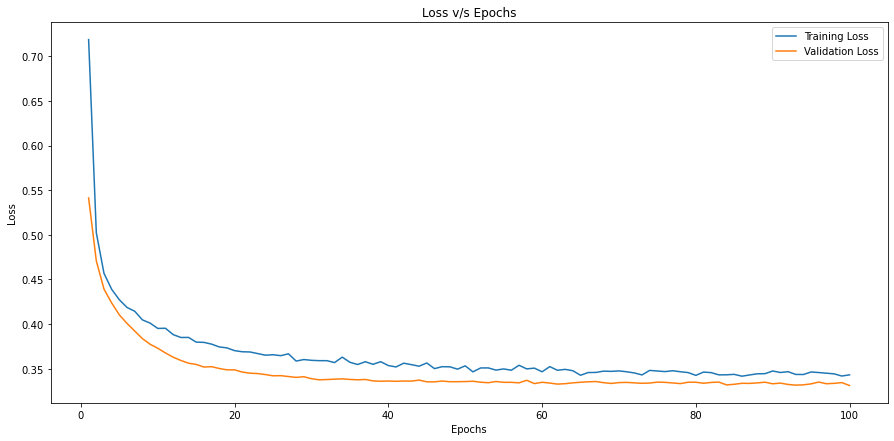

In [167]:
plt.figure(figsize=(15,7))
epochs = range(1,101)
train_loss = model_run.history['loss']
validation_loss = model_run.history['val_loss']
sns.lineplot(epochs, train_loss, label ='Training Loss')
sns.lineplot(epochs, validation_loss, label ='Validation Loss')
plt.title('Loss v/s Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


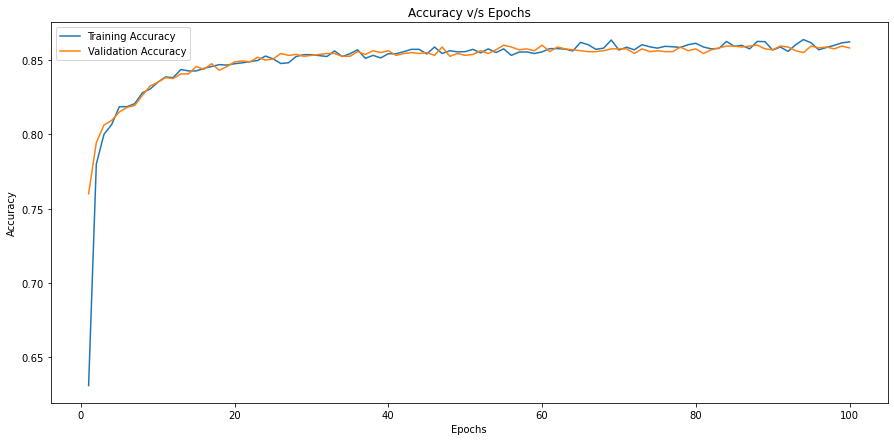

In [168]:
plt.figure(figsize=(15,7))
epochs = range(1,101)
train_accuracy = model_run.history['accuracy']
validation_accuracy = model_run.history['val_accuracy']
sns.lineplot(epochs, train_accuracy, label ='Training Accuracy')
sns.lineplot(epochs, validation_accuracy, label ='Validation Accuracy')
plt.title('Accuracy v/s Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [169]:
classifier.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (32, 10)                  110       
_________________________________________________________________
batch_normalization_4 (Batch (32, 10)                  40        
_________________________________________________________________
dense_10 (Dense)             (32, 7)                   77        
_________________________________________________________________
batch_normalization_5 (Batch (32, 7)                   28        
_________________________________________________________________
dense_11 (Dense)             (32, 1)                   8         
Total params: 263
Trainable params: 229
Non-trainable params: 34
_________________________________________________________________


In [170]:
accu = classifier.evaluate(X_test,y_test)[1]

63/63 [==============================] - 0s 2ms/step - loss: 0.3425 - accuracy: 0.8605


In [171]:
print(f'Accuracy of model is {np.round(accu*100,2)}')

Accuracy of model is 86.05


In [175]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred>0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [178]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[1546,   54],
       [ 225,  175]], dtype=int64)

<AxesSubplot:>

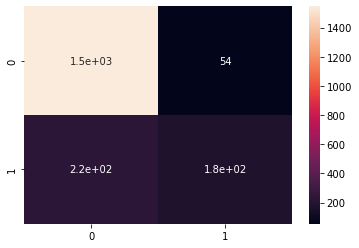

In [177]:
sns.heatmap(conf_mat, annot=True)